### Load Plany Pathology Datas

In [15]:
import pandas as pd
import os
import numpy as np

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [16]:
print(train_df.shape)
train_df.head()

(1821, 5)


,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [17]:
print(test_df.shape)
test_df.head()

(1821, 1)


,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


- Add the image_path column to the train_df

In [18]:
train_df['image_path'] = 'images/' + train_df['image_id'] + '.jpg'
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab,image_path
0,Train_0,0,0,0,1,images/Train_0.jpg
1,Train_1,0,1,0,0,images/Train_1.jpg
2,Train_2,1,0,0,0,images/Train_2.jpg
3,Train_3,0,0,1,0,images/Train_3.jpg
4,Train_4,1,0,0,0,images/Train_4.jpg


- Check one of the train images using cv2

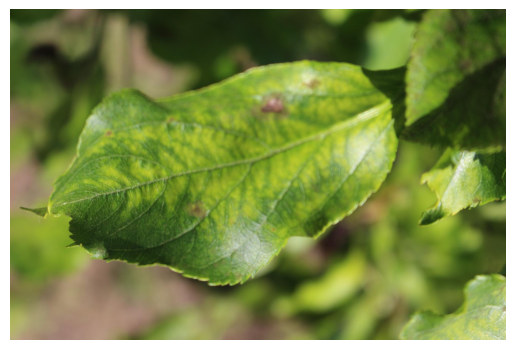

In [11]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread(train_df['image_path'][0]), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

- Add label to the dataframe

In [19]:
def get_label(x):
    if x['healthy'] == 1:
        return 'healthy'
    elif x['multiple_diseases'] == 1:
        return 'multiple_diseases'
    elif x['rust'] == 1:
        return 'rust'
    elif x['scab'] == 1:
        return 'scab'
    else:
        return 'unknown'

train_df['label'] = train_df.apply(get_label, axis=1)
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab,image_path,label
0,Train_0,0,0,0,1,images/Train_0.jpg,scab
1,Train_1,0,1,0,0,images/Train_1.jpg,multiple_diseases
2,Train_2,1,0,0,0,images/Train_2.jpg,healthy
3,Train_3,0,0,1,0,images/Train_3.jpg,rust
4,Train_4,1,0,0,0,images/Train_4.jpg,healthy


In [20]:
train_df['label'].value_counts()

label
rust                 622
scab                 592
healthy              516
multiple_diseases     91
Name: count, dtype: int64

- Add target value based on label to the dataframe

In [21]:
label_dict = {
    'healthy': 0,
    'multiple_diseases': 1,
    'rust': 2,
    'scab': 3
}

train_df['target'] = train_df['label'].map(label_dict)
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab,image_path,label,target
0,Train_0,0,0,0,1,images/Train_0.jpg,scab,3
1,Train_1,0,1,0,0,images/Train_1.jpg,multiple_diseases,1
2,Train_2,1,0,0,0,images/Train_2.jpg,healthy,0
3,Train_3,0,0,1,0,images/Train_3.jpg,rust,2
4,Train_4,1,0,0,0,images/Train_4.jpg,healthy,0


- Make a function to see the images for each label

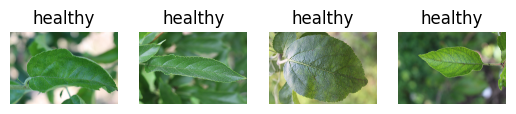

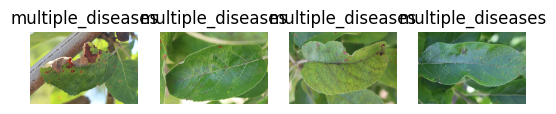

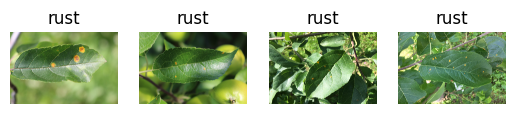

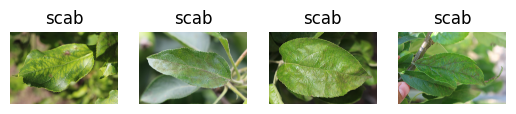

In [23]:
from matplotlib import pyplot as plt
def show_images(image_path, title,ncols=4):
    fig, axs = plt.subplots(ncols=ncols, nrows=1)
    for i in range(ncols):
        axs[i].imshow(cv2.cvtColor(cv2.imread(image_path[i]), cv2.COLOR_BGR2RGB))
        axs[i].set_title(title)
        axs[i].axis('off')
    plt.show()

healthy_image_path = train_df[train_df['label']=='healthy']['image_path'].iloc[:4].tolist()
multiple_diseases_image_path = train_df[train_df['label']=='multiple_diseases']['image_path'].iloc[:4].tolist()
rust_image_path = train_df[train_df['label']=='rust']['image_path'].iloc[:4].tolist()
scab_image_path = train_df[train_df['label']=='scab']['image_path'].iloc[:4].tolist()

show_images(healthy_image_path, 'healthy', 4)
show_images(multiple_diseases_image_path, 'multiple_diseases', 4)
show_images(rust_image_path, 'rust', 4)
show_images(scab_image_path, 'scab', 4)


### Looking at the images, geometric transformations, CLAHE, ColorJitter, and Blur seem to be useful.

- Save this train_df and test_df with pickle

In [24]:
import pickle

with open('train_df.pkl', 'wb') as f:
    pickle.dump(train_df, f)

with open('test_df.pkl', 'wb') as f:
    pickle.dump(test_df, f)